# Sales Transaction Outlier Detection (Z-Score + Histogram)

### Find and analyze outliers in a sales transaction dataset (e.g.,transactions that are unusually high or low).

# Step 1 — Import Libraries & Create Sample Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample sales dataset
np.random.seed(42)

# Normal transactions
normal_sales = np.random.normal(loc=500, scale=80, size=200)

# Inject some extreme outliers
outliers = np.array([50, 80, 1500, 2000, 2500])

# Combine into one array
sales = np.concatenate([normal_sales, outliers])

# Create DataFrame
df = pd.DataFrame({'total_amount': sales})

df.head()


,total_amount
0,539.737132
1,488.938856
2,551.815083
3,621.842389
4,481.267730


# Step 2 — Histogram to Visualize Distribution

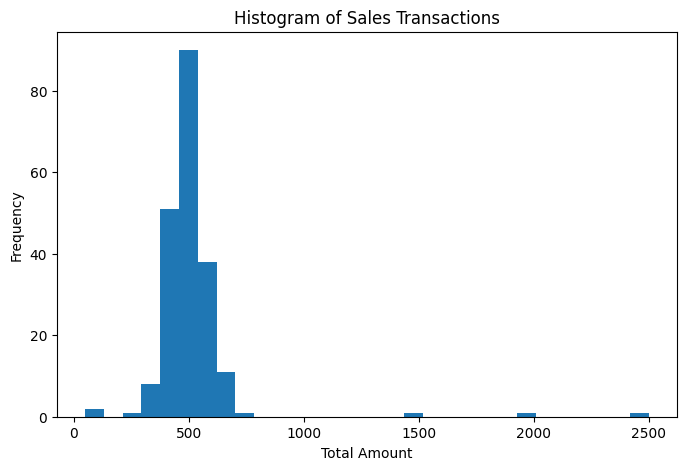

In [2]:
plt.figure(figsize=(8,5))
plt.hist(df['total_amount'], bins=30)
plt.title("Histogram of Sales Transactions")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()


# Step 3 — Calculate Z-Scores for Outlier Detection

In [3]:
mean = df['total_amount'].mean()
std = df['total_amount'].std()

df['z_score'] = (df['total_amount'] - mean) / std

df.head()


,total_amount,z_score
0,539.737132,0.122143
1,488.938856,-0.123957
2,551.815083,0.180657
3,621.842389,0.519915
4,481.267730,-0.161121


# Step 4 — Identify Outliers (Z-Score > 3 or < -3)

In [4]:
outliers_df = df[df['z_score'].abs() > 3]

print("Detected Outliers:")
outliers_df


Detected Outliers:


,total_amount,z_score
202,1500.0,4.774286
203,2000.0,7.196614
204,2500.0,9.618942


# Step 5 — Visualize Outliers on a Plot

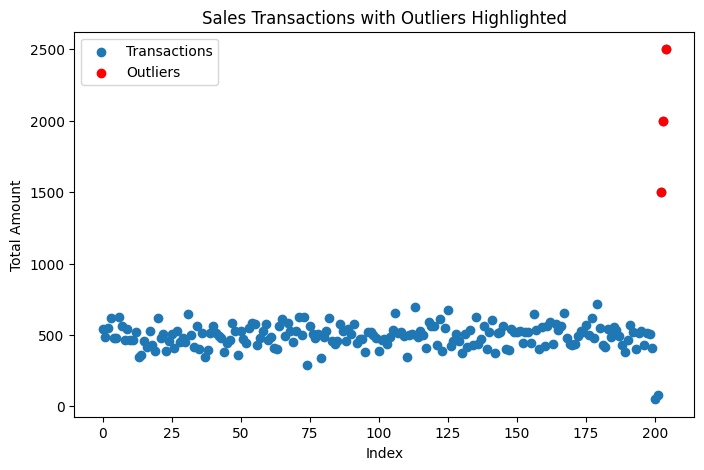

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(df.index, df['total_amount'], label="Transactions")
plt.scatter(outliers_df.index, outliers_df['total_amount'], color='red', label="Outliers")
plt.title("Sales Transactions with Outliers Highlighted")
plt.xlabel("Index")
plt.ylabel("Total Amount")
plt.legend()
plt.show()


# Step 6 — Remove Outliers

In [6]:
df_cleaned = df[df['z_score'].abs() <= 3].copy()

print("Original count:", len(df))
print("After removing outliers:", len(df_cleaned))


Original count: 205
After removing outliers: 202
